# Homework 1

<img src="./files/svm.png">

Try to generate datasets like this, fit SVM on each of them and find best regularization parameter and best kernel for each (use CV).

Dataset settings
- 2 features
- not more than 10k points
- you can either try generating from distributions, and maybe removing some elements after 
- or you can just generate by some functions, this would be easier, but it is OK

In [1]:
from sklearn.datasets import make_blobs, make_gaussian_quantiles, make_circles
from matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
in_shape = 31
features  = 2
classes = 2 

In [3]:

X, y = make_blobs(n_samples=in_shape*classes, centers=classes, n_features=features, random_state=2234 )
print(X[y==0].shape)
print(X[y==1].shape)
print(y[y==0].shape)
print(y[y==1].shape)

(31, 2)
(31, 2)
(31,)
(31,)


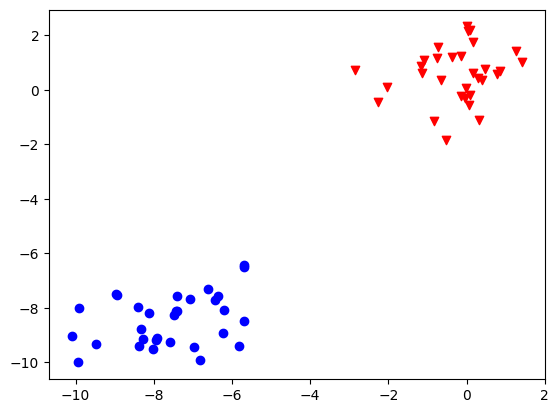

In [4]:
# generate 2d classification dataset

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
X_train = df.drop(columns=['label'])
y_train = df['label']
pyplot.scatter(X_train['x'][y_train==0],X_train['y'][y_train==0],c='red', marker='v')
pyplot.scatter(X_train['x'][y_train==1],X_train['y'][y_train==1],c='blue', marker='o')
pyplot.show()

In [5]:
clf = SVC(kernel='linear')
clf.fit(X, y)


y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


-0.18338333197984907 -0.2288624963089821
[-1.51867508]


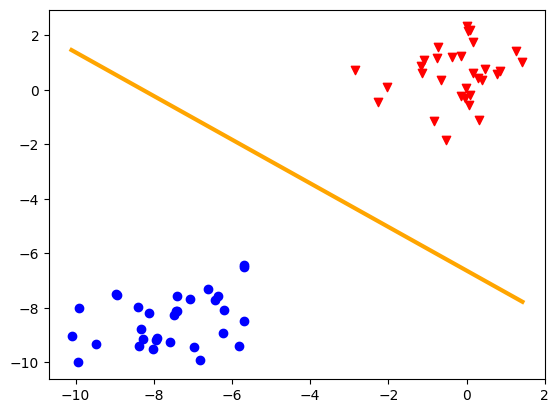

In [6]:
w1, w2 = clf.coef_[0].ravel()
print(w1, w2)
w0 = clf.intercept_
print(w0)



x = np.linspace(np.min(X_train['x']), np.max(X_train['x']))
y_train = df['label']
pyplot.scatter(X_train['x'][y_train==0],X_train['y'][y_train==0],c='red', marker='v')
pyplot.scatter(X_train['x'][y_train==1],X_train['y'][y_train==1],c='blue', marker='o')

pyplot.plot(x, -x*w1/w2  - w0/w2, color='orange', linewidth=3, )

pyplot.show()

C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


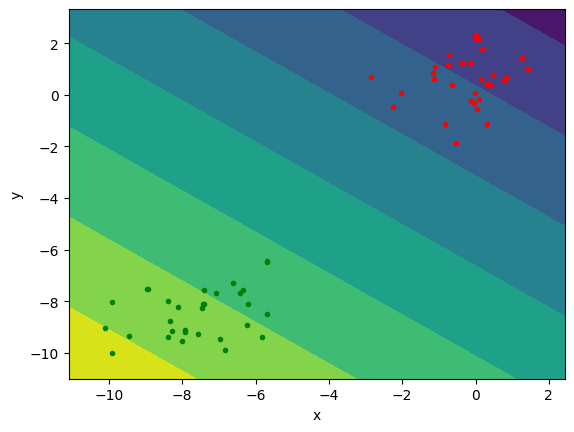

In [7]:
disp = DecisionBoundaryDisplay.from_estimator(clf, X_train)
disp.ax_.plot(X_train['x'][y_train==0], X_train['y'][y_train==0], 'r.')
disp.ax_.plot(X_train['x'][y_train==1], X_train['y'][y_train==1], 'g.')

pyplot.show()

best_params {'kernel': 'linear'}
accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


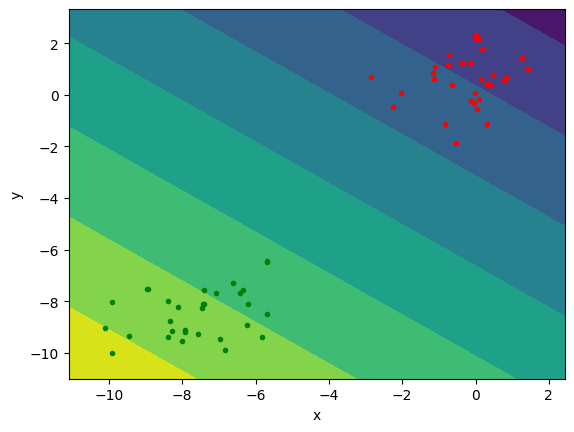

In [8]:
clf = SVC()

grid = GridSearchCV(clf, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})
grid.fit(X_train, y_train)


print('best_params', grid.best_params_)

cross_val_score(grid.best_estimator_, X_train, y_train).mean()

final_cls = grid.best_estimator_
final_cls.fit(X_train, y_train)

y_pred = grid.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

disp = DecisionBoundaryDisplay.from_estimator(final_cls, X_train)
disp.ax_.plot(X_train['x'][y_train==0], X_train['y'][y_train==0], 'r.')
disp.ax_.plot(X_train['x'][y_train==1], X_train['y'][y_train==1], 'g.')

pyplot.show()

In [9]:
low1 = [0, 0]
high1 = [10, 10]
low2 = [20, 20]
high2 = [30, 30]
X = np.zeros((in_shape * classes, features))
y = np.zeros(in_shape * classes)
# Generate 100 samples for each class using NumPy's random.normal() function
X[:in_shape,:] = np.random.uniform(low1, high1, (in_shape, features))
X[in_shape:,:] = np.random.uniform(low2, high2, (in_shape, features))
y[:in_shape] = np.ones(in_shape)
print(X[y==0].shape)
print(X[y==1].shape)
print(y[y==0].shape)
print(y[y==1].shape)

(31, 2)
(31, 2)
(31,)
(31,)


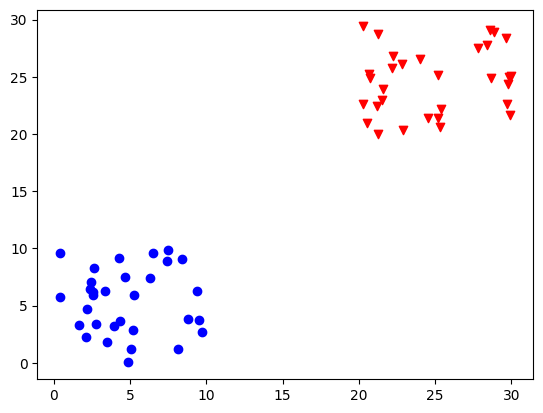

In [10]:
# generate 2d classification dataset

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
X_train = df.drop(columns=['label'])
y_train = df['label']
pyplot.scatter(X_train['x'][y_train==0],X_train['y'][y_train==0],c='red', marker='v')
pyplot.scatter(X_train['x'][y_train==1],X_train['y'][y_train==1],c='blue', marker='o')
pyplot.show()

In [11]:
clf = SVC(kernel='linear')
clf.fit(X, y)


y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


-0.09029884870888043 -0.07688385519668298
[2.45619152]


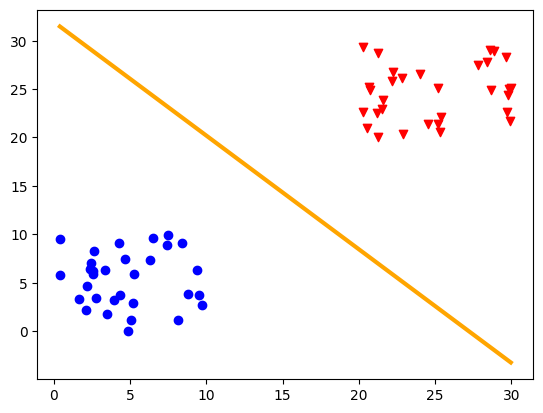

In [12]:
w1, w2 = clf.coef_[0].ravel()
print(w1, w2)
w0 = clf.intercept_
print(w0)



x = np.linspace(np.min(X_train['x']), np.max(X_train['x']))
y_train = df['label']
pyplot.scatter(X_train['x'][y_train==0],X_train['y'][y_train==0],c='red', marker='v')
pyplot.scatter(X_train['x'][y_train==1],X_train['y'][y_train==1],c='blue', marker='o')

pyplot.plot(x, -x*w1/w2  - w0/w2, color='orange', linewidth=3, )

pyplot.show()

C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


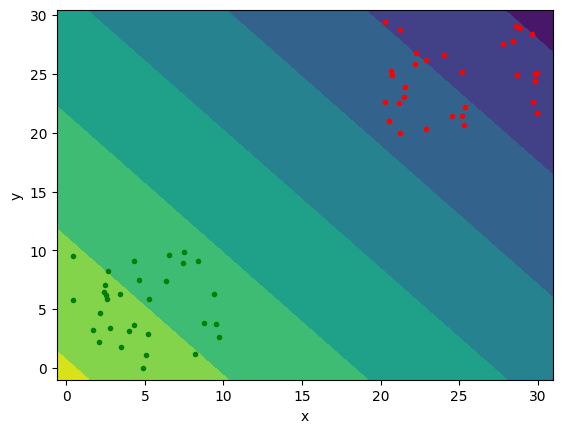

In [13]:
disp = DecisionBoundaryDisplay.from_estimator(clf, X_train)
disp.ax_.plot(X_train['x'][y_train==0], X_train['y'][y_train==0], 'r.')
disp.ax_.plot(X_train['x'][y_train==1], X_train['y'][y_train==1], 'g.')

pyplot.show()

best_params {'kernel': 'linear'}
accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


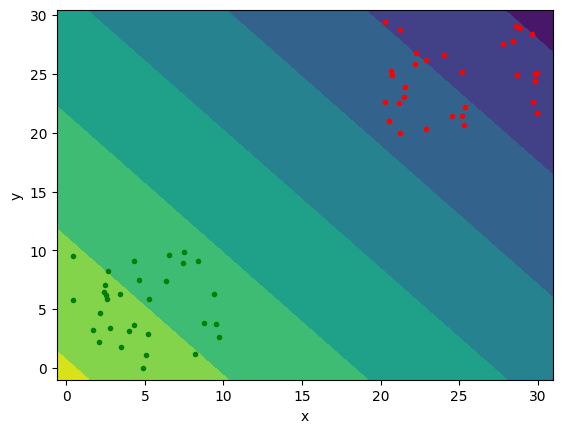

In [14]:
clf = SVC()

grid = GridSearchCV(clf, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})
grid.fit(X_train, y_train)


print('best_params', grid.best_params_)

cross_val_score(grid.best_estimator_, X_train, y_train).mean()

final_cls = grid.best_estimator_
final_cls.fit(X_train, y_train)

y_pred = grid.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

disp = DecisionBoundaryDisplay.from_estimator(final_cls, X_train)
disp.ax_.plot(X_train['x'][y_train==0], X_train['y'][y_train==0], 'r.')
disp.ax_.plot(X_train['x'][y_train==1], X_train['y'][y_train==1], 'g.')

pyplot.show()

In [15]:

X, y = make_blobs(n_samples=in_shape*classes, centers=classes, n_features=features, random_state=224)

print(X[y==0].shape)
print(X[y==1].shape)
print(y[y==0].shape)
print(y[y==1].shape)


(31, 2)
(31, 2)
(31,)
(31,)


C:\Users\Machine Learning\AppData\Local\Temp\ipykernel_78896\350090212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[X_train.values[:,0]==val] = 0


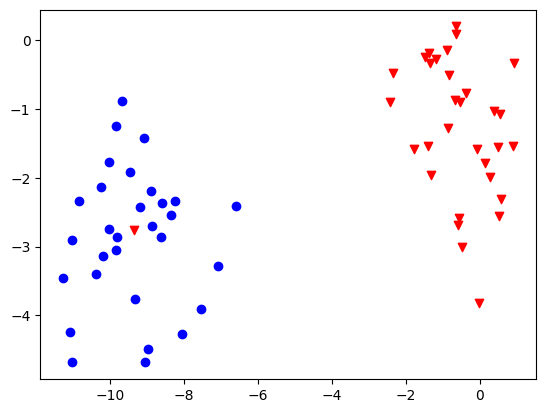

In [16]:
# generate 2d classification dataset

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
X_train = df.drop(columns=['label'])
y_train = df['label']

if X_train.values[y_train==1].shape[0]%2 != 0 :
    val= np.median(X_train.values[:,0][y_train==1], axis=0, )
    
else:
    val= np.median(X_train.values[:,0][y_train==1][1:,], axis=0, )
y_train[X_train.values[:,0]==val] = 0
pyplot.scatter(X_train['x'][y_train==0],X_train['y'][y_train==0],c='red', marker='v')
pyplot.scatter(X_train['x'][y_train==1],X_train['y'][y_train==1],c='blue', marker='o')
pyplot.show()


In [17]:
clf = SVC(kernel='linear')
clf.fit(X, y)


y_pred = clf.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.9838709677419355
precision 0.967741935483871
recall 1.0
f1 0.9836065573770492


C:\Users\Machine Learning\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


-0.4246356686261263 -0.15444219316376784
[-2.17319745]


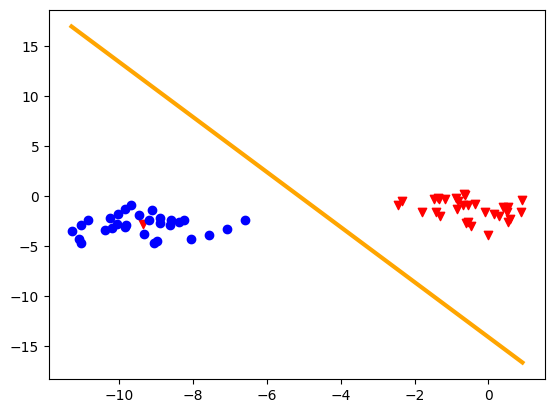

In [18]:
w1, w2 = clf.coef_[0].ravel()
print(w1, w2)
w0 = clf.intercept_
print(w0)



x = np.linspace(np.min(X_train['x']), np.max(X_train['x']))
y_train = df['label']
pyplot.scatter(X_train['x'][y_train==0],X_train['y'][y_train==0],c='red', marker='v')
pyplot.scatter(X_train['x'][y_train==1],X_train['y'][y_train==1],c='blue', marker='o')

pyplot.plot(x, -x*w1/w2  - w0/w2, color='orange', linewidth=3, )

pyplot.show()

best_params {'kernel': 'linear'}
accuracy 0.9838709677419355
precision 0.967741935483871
recall 1.0
f1 0.9836065573770492


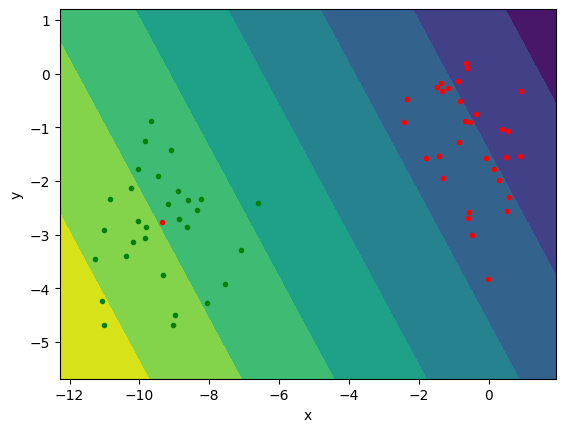

In [19]:
clf = SVC()

grid = GridSearchCV(clf, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})
grid.fit(X_train, y_train)


print('best_params', grid.best_params_)

cross_val_score(grid.best_estimator_, X_train, y_train).mean()

final_cls = grid.best_estimator_
final_cls.fit(X_train, y_train)

y_pred = grid.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

disp = DecisionBoundaryDisplay.from_estimator(final_cls, X_train)
disp.ax_.plot(X_train['x'][y_train==0], X_train['y'][y_train==0], 'r.')
disp.ax_.plot(X_train['x'][y_train==1], X_train['y'][y_train==1], 'g.')

pyplot.show()

In [20]:
in_shape = 300
features  = 2
classes = 2 

In [21]:
X = np.zeros((in_shape*classes, features))
y = np.zeros(in_shape*classes)

X_blobs, y_blobs = make_blobs(n_samples=in_shape*classes, centers=2, n_features=features, random_state=2234, center_box=[0,0] )

X_circle, y_circle = make_circles(n_samples=in_shape*classes, noise=0.03, factor=0.5, random_state=1, )

X[:in_shape,] = X_blobs[y_blobs==1]


X[in_shape:,] = X_circle[y_circle==0]*4
y[in_shape:] = np.ones(in_shape)


print(X[y==0].shape)
print(X[y==1].shape)
print(y[y==0].shape)
print(y[y==1].shape)


(300, 2)
(300, 2)
(300,)
(300,)


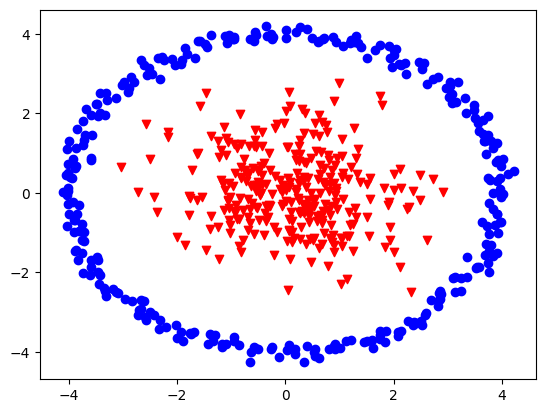

In [22]:
# generate 2d classification dataset

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
X_train = df.drop(columns=['label'])
y_train = df['label']
pyplot.scatter(X_train['x'][y_train==0],X_train['y'][y_train==0],c='red', marker='v')
pyplot.scatter(X_train['x'][y_train==1],X_train['y'][y_train==1],c='blue', marker='o')
pyplot.show()

In [23]:
y =y[X[:,0] > -3]
X = X[X[:,0] > -3]


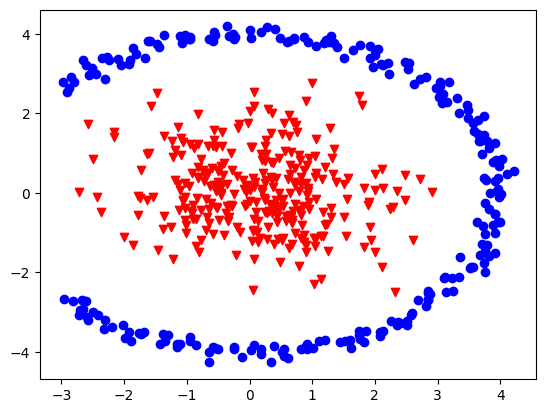

In [24]:
# generate 2d classification dataset

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
X_train = df.drop(columns=['label'])
y_train = df['label']
pyplot.scatter(X_train['x'][y_train==0],X_train['y'][y_train==0],c='red', marker='v')
pyplot.scatter(X_train['x'][y_train==1],X_train['y'][y_train==1],c='blue', marker='o')
pyplot.show()

best_params {'kernel': 'rbf'}
accuracy 0.9981167608286252
precision 0.9957081545064378
recall 1.0
f1 0.9978494623655914


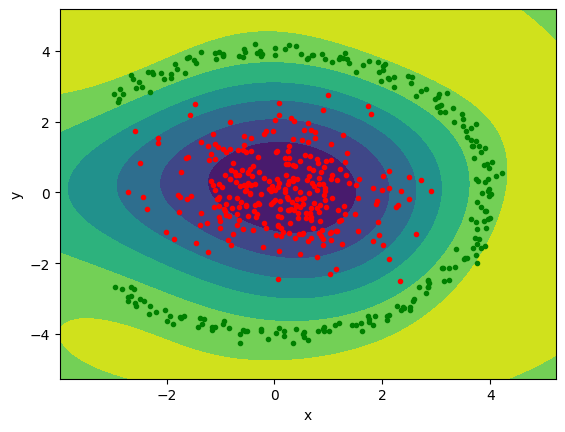

In [25]:
clf = SVC()

grid = GridSearchCV(clf, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})
grid.fit(X_train, y_train)


print('best_params', grid.best_params_)

cross_val_score(grid.best_estimator_, X_train, y_train).mean()

final_cls = grid.best_estimator_
final_cls.fit(X_train, y_train)

y_pred = grid.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

disp = DecisionBoundaryDisplay.from_estimator(final_cls, X_train)
disp.ax_.plot(X_train['x'][y_train==0], X_train['y'][y_train==0], 'r.')
disp.ax_.plot(X_train['x'][y_train==1], X_train['y'][y_train==1], 'g.')

pyplot.show()

# Homework 2ravel

Write a function is_kernel_function(func), which will return True if given function is a kernel function and False if it is not.

In [29]:
def is_kernel_function(func):
    # It must be symmetric and
    #positive-semidefinite for proper sampling.
    eigenvalues, _ = np.linalg.eig(matrix)
    return np.array_equal(matrix, matrix.T) and np.all(eigenvalues >= 0)


In [27]:
def is_symmetric(matrix):
    return np.array_equal(matrix, matrix.T)

In [31]:
matrix = np.array([[1, 2, 3], [2, 4, 5], [3, 5, 6]])
is_symmetric(matrix)

True